# Sampling

A quick check to see if we can see oscillations in samples...

In [1]:
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.training import HParams

import numpy as np

sys.path.append("../")

from model import RhoCMPS

In [2]:
sess = tf.InteractiveSession()

In [3]:
SAMPLE_RATE = 16000

In [4]:
hparams = HParams(minibatch_size=8, bond_dim=2, delta_t=1/SAMPLE_RATE, sigma=0.0011, initial_rank=None, A=1,
                  h_reg=2/(np.pi * SAMPLE_RATE)**2, r_reg=2/(np.pi * SAMPLE_RATE)**2,)

In [5]:
ω = 10
R = np.array([[0,1],[0,0]], dtype=np.float32)
H = np.array([ω,-ω], dtype=np.float32)

In [6]:
qubit = RhoCMPS(hparams, Rx_in=R, H_in=H)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
waveform = qubit.sample_rho(3, length=512)

In [12]:
sess.run(tf.global_variables_initializer())

In [13]:
waveform_out = waveform.eval()

In [14]:
import matplotlib.pyplot as plt

In [20]:
waveform_out.shape

(3, 512)

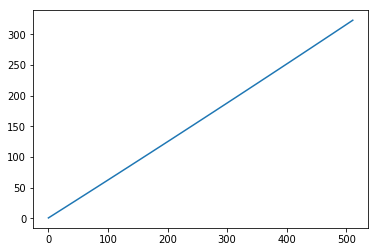

In [22]:
plt.plot(waveform_out[1])
plt.show()